In [1]:
## Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn import feature_selection
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import utils 
from sklearn import tree
from sklearn import naive_bayes 
from sklearn import neighbors
from sklearn import ensemble

In [2]:
## Reading data using read_csv function
df=pd.read_csv("churn_train.csv")

## Displaying first 5 records of the dataframe
df.head(5)

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.shape

(3333, 21)

### Initially : 3333 rows & 21 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   st          3333 non-null   object 
 1   acclen      3333 non-null   int64  
 2   arcode      3333 non-null   int64  
 3   phnum       3333 non-null   object 
 4   intplan     3333 non-null   object 
 5   voice       3333 non-null   object 
 6   nummailmes  3333 non-null   int64  
 7   tdmin       3333 non-null   float64
 8   tdcal       3333 non-null   int64  
 9   tdchar      3333 non-null   float64
 10  temin       3333 non-null   float64
 11  tecal       3333 non-null   int64  
 12  tecahr      3333 non-null   float64
 13  tnmin       3333 non-null   float64
 14  tncal       3333 non-null   int64  
 15  tnchar      3333 non-null   float64
 16  timin       3333 non-null   float64
 17  tical       3333 non-null   int64  
 18  tichar      3333 non-null   float64
 19  ncsc        3333 non-null  

In [5]:
df.describe()

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Conclusion: 
### Applying the .describe() function and analizing the mean values, standard deviations, minimum values, maximum values and different percentile values, we can conclude that the continuous columns of this dataset needs to be standardized.

In [6]:
# checking for null values

df.isna().sum()/df.shape[0]*100

st            0.0
acclen        0.0
arcode        0.0
phnum         0.0
intplan       0.0
voice         0.0
nummailmes    0.0
tdmin         0.0
tdcal         0.0
tdchar        0.0
temin         0.0
tecal         0.0
tecahr        0.0
tnmin         0.0
tncal         0.0
tnchar        0.0
timin         0.0
tical         0.0
tichar        0.0
ncsc          0.0
label         0.0
dtype: float64

## Conclusion: 
### There are no null values present in the given dataset.

In [7]:
# number of the unique values in each column

df.nunique()

st              51
acclen         212
arcode           3
phnum         3333
intplan          2
voice            2
nummailmes      46
tdmin         1667
tdcal          119
tdchar        1667
temin         1611
tecal          123
tecahr        1440
tnmin         1591
tncal          120
tnchar         933
timin          162
tical           21
tichar         162
ncsc            10
label            2
dtype: int64

In [8]:
# counting the two types of values in the 'label' column 

df["label"].value_counts()

False.    2850
True.      483
Name: label, dtype: int64

In [9]:
#dropping the unnecessary columns 

df.drop(["st","arcode","phnum","acclen"],axis=1,inplace=True)

In [10]:
df.shape

(3333, 17)

### After dropping : 3333 rows & 17 columns

In [11]:
# name of the columns

df.columns

Index(['intplan', 'voice', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin',
       'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar', 'timin', 'tical',
       'tichar', 'ncsc', 'label'],
      dtype='object')

In [12]:
# Renaming the elements of "intplan" , "voice" & "label"  columns as per convenience

df["intplan"]=df["intplan"].apply(lambda s: 1 if s=="yes" else 0)
df["voice"]=df["voice"].apply(lambda s: 1 if s=="yes" else 0)
df["label"]=df["label"].apply(lambda s: 1 if s=="True." else 0)

In [13]:
df.head(5)

,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Conclusion:
### From the above result, we can conclude that, the columns, 'intplan', 'voice' and 'label' have discrete values.
### Whereas the columns, 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc' have continuous values

# EDA of the Discrete Columns:->

## Countplot of 'intplan' vs 'label' :

<AxesSubplot:xlabel='intplan', ylabel='count'>

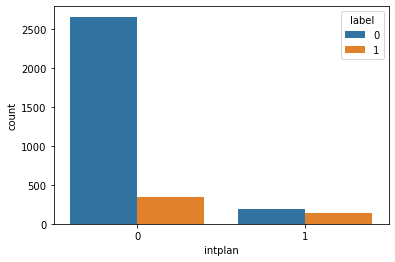

In [14]:
sns.countplot(x="intplan",data=df,hue="label")

In [15]:
# Crosstab of 'intplan' vs 'label'

pd.crosstab(index=df["intplan"],columns=df["label"],normalize="index")

label,0,1
intplan,,
0,0.885050,0.114950
1,0.575851,0.424149


## Conclusion:
### From the above plotting and the crosstab we can conclude that percentage of people who churned(1) while they have intplan(1) is higher than the people who churned(1) while they did not have intplan(0).

## Countplot of 'voice' vs 'label' :

<AxesSubplot:xlabel='voice', ylabel='count'>

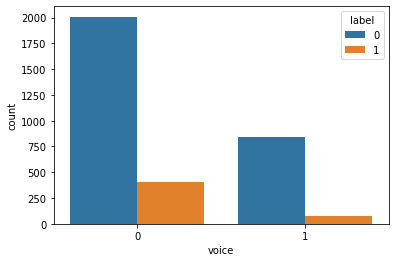

In [16]:
sns.countplot(x="voice",data=df,hue="label")

In [17]:
# Crosstab of 'voice' vs 'label'

pd.crosstab(index=df["voice"],columns=df["label"],normalize="index")

label,0,1
voice,,
0,0.832849,0.167151
1,0.913232,0.086768


## Conclusion :
### Here we can see that if voice is not activated (i.e. 0), the percentage of churning (1) is higher than the same while the voice is activated (i.e. 1).

# EDA of Continuous Columns:->

## Boxplot of 'nummailmes' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='nummailmes'>

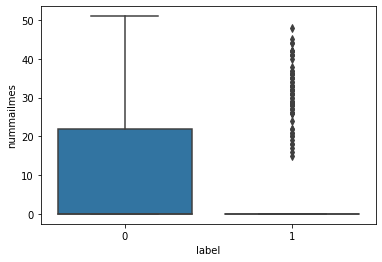

In [18]:
sns.boxplot(x="label", y="nummailmes", data=df)

## Conclusion :
### The above boxplot suggests that the Number of mail messages ('nummailmes') is higher when the customer churned and it is less when the customer did not churn. But the count of people having more mail messages, who churned from the company is very less. 
### So from the boxplot we can't determine properly whether the column 'nummailmes' impacts the 'label' or not.

## Boxplot of 'tdmin' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tdmin'>

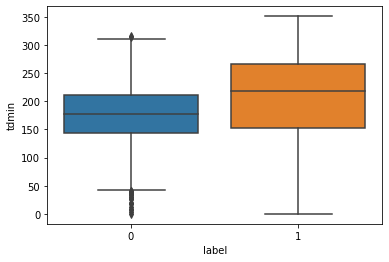

In [19]:
sns.boxplot(x="label", y="tdmin", data=df)

## Conclusion :
### From the above boxplot we can see that if the customer has churned then the amount of Total day messages ('tdmin') is higher than if they has not churned.
### The column 'tdmin' affects 'label'

## Boxplot of 'tdcal' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tdcal'>

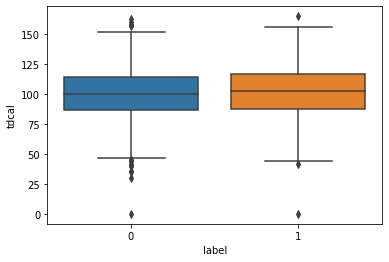

In [20]:
sns.boxplot(x="label", y="tdcal", data=df)

## Conclusion :
### As we can see that the column 'tdcal' is not creating much difference in the status of churning, we can conclude that the column 'tdcal' does not affect 'label'.

## Boxplot of 'tdchar' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tdchar'>

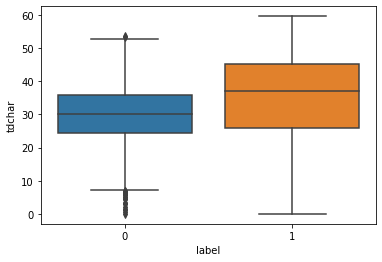

In [21]:
sns.boxplot(x="label", y="tdchar", data=df)

## Conclusion :
### We can observe that the Total day time charges ('tdchar') when the 'label' value is 1, is higher than when the 'label' value is 0. But we also notice that the plot of " 'tdmin' vs 'label' " is exactly same, so we will check for colinearity.

## Boxplot of 'temin' vs 'label :

<AxesSubplot:xlabel='label', ylabel='temin'>

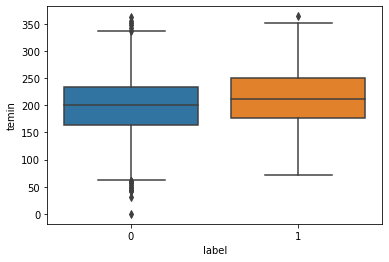

In [22]:
sns.boxplot(x="label", y="temin", data=df)

## Conclusion :
### As the plot suggests, the range of values of the column 'temin' is slightly higher when the 'label' value is 1.
### 'temin' has an impact on 'label'

## Boxplot of 'tecal' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tecal'>

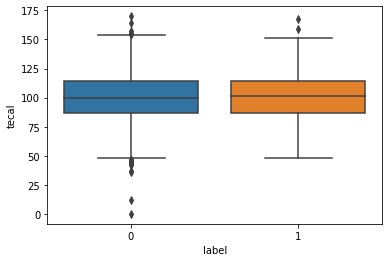

In [23]:
sns.boxplot(x="label", y="tecal", data=df)

## Conclusion :
### As we can see that the column 'tecal' is not creating much difference in the status of churning, we can conclude that the column 'tecal' does not affect 'label'.

## Boxplot of 'tecahr' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tecahr'>

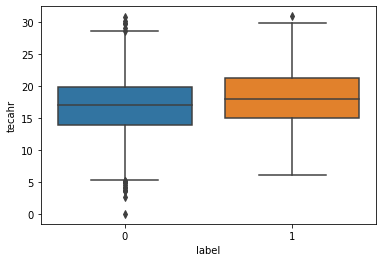

In [24]:
sns.boxplot(x="label", y="tecahr", data=df)

## Conclusion :
### We can observe that the Total evening time charges ('tecahr') is higher when the 'label' value is 1, than when the 'label' value is 0. But we also notice that the plot of " 'temin' vs 'label' " is exactly same as the above plot, so we will check for colinearity.

## Boxplot of 'tnmin' vs 'label :

<AxesSubplot:xlabel='label', ylabel='tnmin'>

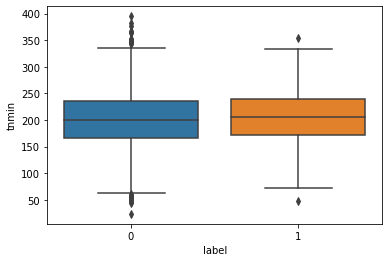

In [25]:
sns.boxplot(x="label", y="tnmin", data=df)

## Conclusion :
### The range of values of 'tnmin' when the customer has churned is very slightly higher than when the customer has not churned.
### So we can say the column 'tnmin' has some impact on 'label'.

## Boxplot of 'tncal' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tncal'>

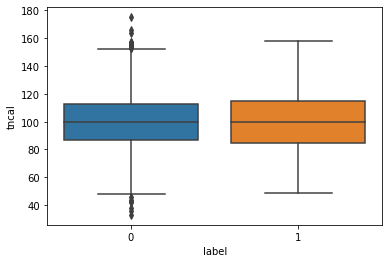

In [26]:
sns.boxplot(x="label", y="tncal", data=df)

## Conclusion :
### From the above boxplot we can see that if the customer has churned then the amount of Total night time calls ('tncal') is slightly higher than if they has not churned.
### The column 'tncal' affects 'label'

## Boxplot of 'tnchar' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tnchar'>

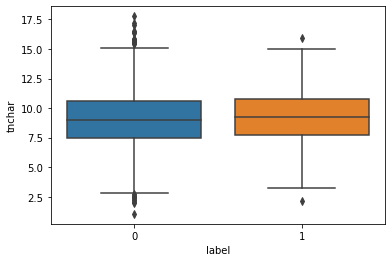

In [27]:
sns.boxplot(x="label", y="tnchar", data=df)

## Conclusion :
### We can observe that the Total night time charges ('tnchar') when the 'label' value is 1, is higher than when the 'label' value is 0. But we also notice that the plot similar to the plot of " 'tnmin' vs 'label' ", so we will check for colinearity.

## Boxplot of 'timin' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='timin'>

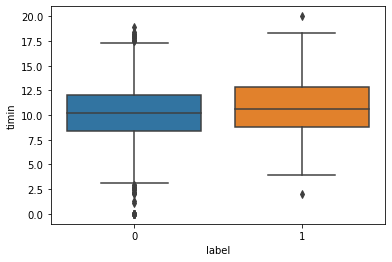

In [28]:
sns.boxplot(x="label", y="timin", data=df)

## Conclusion :
### The range of values of Total international minutes ('timin') when the customer has churned is very slightly higher than when the customer has not churned.
### So we can say the column 'timin' has some impact on 'label'.

## Boxplot of 'tical' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tical'>

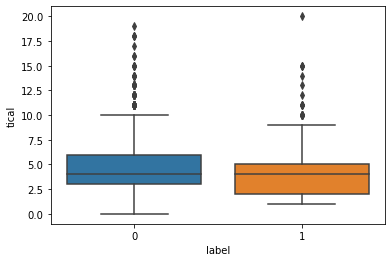

In [29]:
sns.boxplot(x="label", y="tical", data=df)

## Conclusion :
### The range of values of Total international calls('tical') is noticably higher when the customer has not churned.
### The column 'tical' affects 'label'.

## Boxplot of 'tichar' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='tichar'>

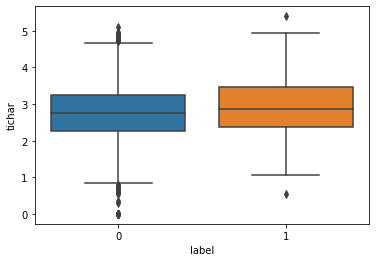

In [30]:
sns.boxplot(x="label", y="tichar", data=df)

## Conclusion :
### We can observe that the Total international charges ('tichar') is higher when the 'label' value is 1, than when the 'label' value is 0. But we also notice that the plot of " 'timin' vs 'label' " is exactly same as the above plot, so we will check for colinearity.

## Boxplot of 'ncsc' vs 'label' :

<AxesSubplot:xlabel='label', ylabel='ncsc'>

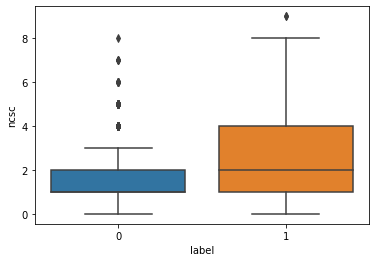

In [31]:
sns.boxplot(x="label", y="ncsc", data=df)

## Conclusion :
### The range of values of No. of customer service calls('ncsc') is noticably higher when the customer has churned.
### The column 'ncsc' affects 'label'.

## Countplot of 'ncsc' vs 'label' :

<AxesSubplot:xlabel='ncsc', ylabel='count'>

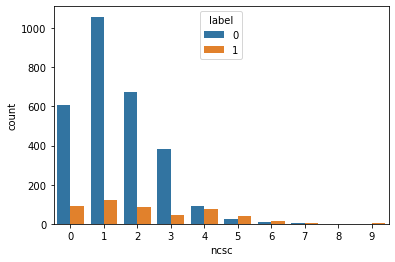

In [32]:
sns.countplot(x="ncsc",data=df,hue="label")

In [33]:
# Crosstab of 'ncsc' vs 'label'

pd.crosstab(index=df["ncsc"],columns=df["label"],normalize="index")

label,0,1
ncsc,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


## Conclusion :
### From the above crosstab and the graph, we can clearly conclude that if the Number Of Customer Service Calls ('ncsc') is higher than 4, then the percentage of churning is significantly higher.

In [34]:
## Checking for the correlated columns

correlated_features=set()
correlation_matrix=df.drop("label",axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.8:
            colname=correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

{'nummailmes', 'tnchar', 'tdchar', 'tecahr', 'tichar'}


In [35]:
## Dropped the correlated & unnecessary columns and divided the dataset into X and y.

X=df.drop(["label",'nummailmes', 'tdchar', 'tecahr', 'tichar', 'tnchar','tdcal','tecal'],axis=1)
y=df["label"]

In [36]:
X

,intplan,voice,tdmin,temin,tnmin,tncal,timin,tical,ncsc
0,0,1,265.1,197.4,244.7,91,10.0,3,1
1,0,1,161.6,195.5,254.4,103,13.7,3,1
2,0,0,243.4,121.2,162.6,104,12.2,5,0
3,1,0,299.4,61.9,196.9,89,6.6,7,2
4,1,0,166.7,148.3,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...
3328,0,1,156.2,215.5,279.1,83,9.9,6,2
3329,0,0,231.1,153.4,191.3,123,9.6,4,3
3330,0,0,180.8,288.8,191.9,91,14.1,6,2
3331,1,0,213.8,159.6,139.2,137,5.0,10,2


In [37]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: label, Length: 3333, dtype: int64

## Checking the number of important features with the help of 'RFECV' :

In [38]:
rfc=ensemble.RandomForestClassifier(random_state=100)
rfecv=RFECV(estimator=rfc,step=1,cv=5,scoring="accuracy")

In [39]:
rfecv.fit(X,y)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=100),
      scoring='accuracy')

In [40]:
print("Optimal number of features: {}".format(rfecv.n_features_))

Optimal number of features: 9


### The number of columns in X were 9 and here also we got 9 optimal features. So we can conclude from here that all the columns are important for our prediction.

In [41]:
## Splitting the dataset into train and test part.  We are allocating 20% of the data to the test part.

Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=100)

In [42]:
## Standardising the continuous columns of the dataset.

scaler=preprocessing.StandardScaler()     

Xtrain[[ 'tdmin', 'temin', 'tnmin', 'tncal', 'timin', 'tical',  'ncsc']]=scaler.fit_transform(Xtrain[[ 'tdmin',  'temin', 'tnmin', 'tncal',  'timin', 'tical', 'ncsc']])
Xtest[[ 'tdmin',  'temin', 'tnmin', 'tncal', 'timin', 'tical',  'ncsc']]=scaler.transform(Xtest[[ 'tdmin',  'temin', 'tnmin', 'tncal',  'timin', 'tical', 'ncsc']])

<ipython-input-42-f6e45d941b5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain[[ 'tdmin', 'temin', 'tnmin', 'tncal', 'timin', 'tical',  'ncsc']]=scaler.fit_transform(Xtrain[[ 'tdmin',  'temin', 'tnmin', 'tncal',  'timin', 'tical', 'ncsc']])
G:\anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-42-f6e45d941b5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [43]:
## Checking if Multi colinearity exist or not

vifdf=pd.DataFrame()
vifdf['Features']=Xtrain.columns
vifdf["VIF"]=[variance_inflation_factor(Xtrain.values,i) for i in range(Xtrain.shape[1])]
vifdf['VIF']=round(vifdf["VIF"],2)
vifdf=vifdf.sort_values(by ="VIF",ascending=False)
print(vifdf)

  Features   VIF
0  intplan  1.03
1    voice  1.03
2    tdmin  1.00
3    temin  1.00
4    tnmin  1.00
5    tncal  1.00
6    timin  1.00
7    tical  1.00
8     ncsc  1.00


##### As the VIF of every column is less than 5.00 we can conclude that none of the columns have multi colinearity

In [44]:
## Creating the model for the prediction

model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)

LogisticRegression()

In [45]:
## Storing the predicted result of train data and test data respectively to 'trainp' and 'testp'

trainp=model.predict(Xtrain)
testp=model.predict(Xtest)

In [46]:
## Created a function named 'modelstat' to check the predited result for different models such as Logistic Regression, Desicion Tree, Random Forest, Naive Bayes, K-Nearest Neighbour


def modelstat(Xtrain,Xtest,ytrain,ytest):
    stats=[] 
    modelnames=["LR","DecisionTree","KNN","NB","RF"]
    models=list()
    models.append(linear_model.LogisticRegression())
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    models.append(ensemble.RandomForestClassifier())
    for name,model in zip(modelnames,models): 
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k} 
            grid_obj=model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1") 
            grid_fit=grid_obj.fit(Xtrain,ytrain) 
            model =grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
        else:
            model.fit(Xtrain,ytrain)
            trainprediction=model.predict(Xtrain)
            testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        print(metrics.classification_report(ytest,testprediction))
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)


In [47]:
## Checking the predicted result using the function 'modelstat'

modelstat(Xtrain,Xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       593
           1       0.47      0.27      0.34        74

    accuracy                           0.88       667
   macro avg       0.69      0.62      0.64       667
weighted avg       0.86      0.88      0.87       667

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       593
           1       0.62      0.80      0.70        74

    accuracy                           0.92       667
   macro avg       0.80      0.87      0.83       667
weighted avg       0.93      0.92      0.93       667

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       593
           1       0.62      0.80      0.70        74

    accuracy                           0.92       667
   macro avg       0.80      0.87      0.83       667
weighted avg       0.93      0.92      0.93       667

              preci

,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.854089,0.560976,0.224939,0.596519
1,LR-test,0.884558,0.465116,0.270270,0.615742
2,DecisionTree-train,1.000000,1.000000,1.000000,1.000000
3,DecisionTree-test,0.923538,0.621053,0.797297,0.868295
4,KNN(5)-train,1.000000,1.000000,1.000000,1.000000
5,KNN(5)-test,0.923538,0.621053,0.797297,0.868295
6,NB-train,0.850338,0.514535,0.432763,0.679385
7,NB-test,0.862069,0.392857,0.445946,0.679971
8,RF-train,1.000000,1.000000,1.000000,1.000000
9,RF-test,0.967016,0.882353,0.810811,0.898660
